<ipython-input-2-baed11e18f82>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Date'] = pd.to_datetime(americas_df['Date'])
<ipython-input-2-baed11e18f82>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
<ipython-input-2-baed11e18f82>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

                      Country/Region  Confirmed  Deaths
0                Antigua and Barbuda          8       0
1                          Argentina        630      23
2                            Bahamas          9       0
3                           Barbados         14       0
4                             Belize          0       0
5                            Bolivia         88       0
6                             Brazil       2982      21
7                             Canada       4837      45
8                              Chile       1871       0
9                           Colombia        594       0
10                        Costa Rica        420       2
11                              Cuba         58       3
12                          Dominica          0       0
13                Dominican Republic        220       6
14                           Ecuador        991      18
15                       El Salvador          2       0
16                           Grenada          0 

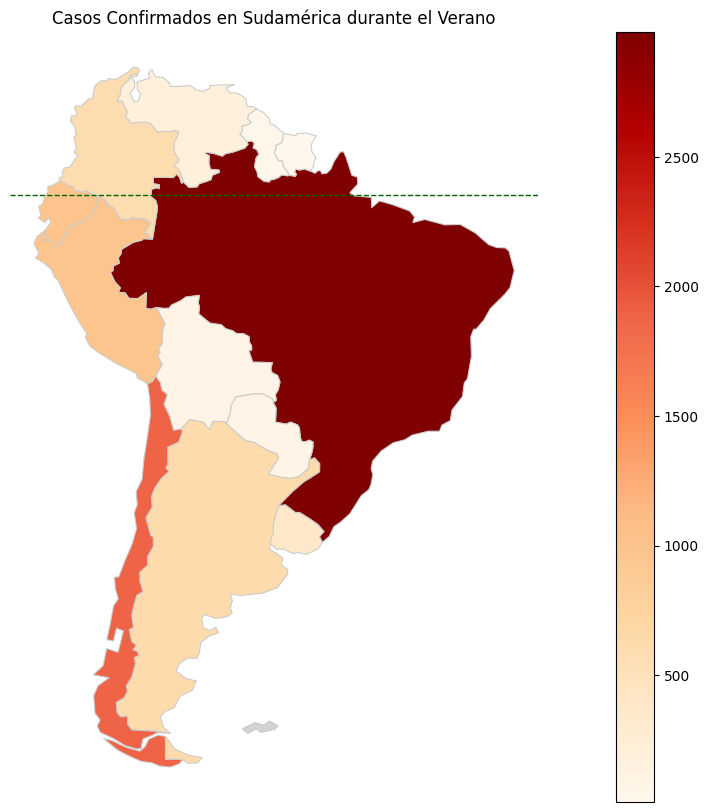

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv('covid_19_clean_complete.csv')

americas_df = df[df['WHO Region'] == 'Americas']

americas_df['Date'] = pd.to_datetime(americas_df['Date'])

americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
americas_df['Deaths'] = americas_df['Deaths'].apply(lambda x: max(x, 0))

start_date = '2020-01-01'
end_date = '2020-03-20'

summer_df = americas_df[(americas_df['Date'] >= start_date) & (americas_df['Date'] <= end_date)]

americas_accumulated = summer_df.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

americas_accumulated['Country/Region'] = americas_accumulated['Country/Region'].replace('US', 'United States of America')

print(americas_accumulated)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

america_north = world[world['continent'] == 'North America']  # Filtrar para América del Norte
america_south = world[world['continent'] == 'South America']  # Filtrar para América del Sur
america = gpd.GeoDataFrame(pd.concat([america_north, america_south], ignore_index=True))

#america_north = world[world['continent'] == 'North America']  # Filtrar para América del Norte
#america_south = world[world['continent'] == 'South America']  # Filtrar para América del Sur
america = america_south


merged_data = america.merge(americas_accumulated, left_on='name', right_on='Country/Region', how='left')

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Casos Confirmados en Sudamérica durante el Verano')

merged_data.plot(column='Confirmed', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': 'lightgrey'})

ax.set_aspect('equal')

ax.axhline(0, color='darkgreen', linestyle='--', linewidth=1)

ax.axis('off')

plt.show()


<ipython-input-1-379a11633ae2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Date'] = pd.to_datetime(americas_df['Date'])
<ipython-input-1-379a11633ae2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
<ipython-input-1-379a11633ae2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

                      Country/Region  Confirmed  Deaths
0                Antigua and Barbuda          8       0
1                          Argentina        630      23
2                            Bahamas          9       0
3                           Barbados         14       0
4                             Belize          0       0
5                            Bolivia         88       0
6                             Brazil       2982      21
7                             Canada       4837      45
8                              Chile       1871       0
9                           Colombia        594       0
10                        Costa Rica        420       2
11                              Cuba         58       3
12                          Dominica          0       0
13                Dominican Republic        220       6
14                           Ecuador        991      18
15                       El Salvador          2       0
16                           Grenada          0 

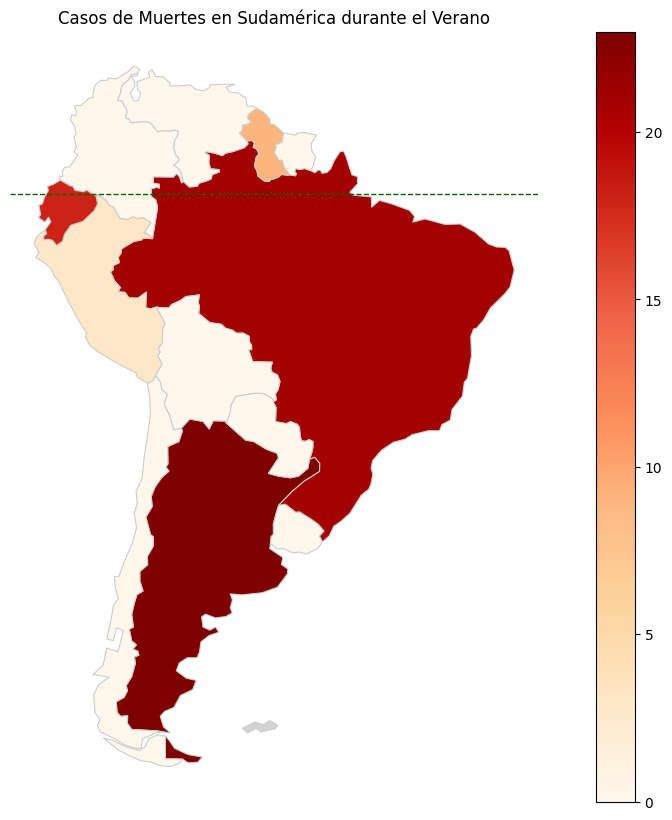

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv('covid_19_clean_complete.csv')

americas_df = df[df['WHO Region'] == 'Americas']

americas_df['Date'] = pd.to_datetime(americas_df['Date'])

americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
americas_df['Deaths'] = americas_df['Deaths'].apply(lambda x: max(x, 0))

start_date = '2020-01-01'
end_date = '2020-03-20'

summer_df = americas_df[(americas_df['Date'] >= start_date) & (americas_df['Date'] <= end_date)]

americas_accumulated = summer_df.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

print(americas_accumulated)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

america_north = world[world['continent'] == 'North America']  # Filtrar para América del Norte
america_south = world[world['continent'] == 'South America']  # Filtrar para América del Sur
america = america_south

merged_data = america.merge(americas_accumulated, left_on='name', right_on='Country/Region', how='left')

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Casos de Muertes en Sudamérica durante el Verano')

merged_data.plot(column='Deaths', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': 'lightgrey'})

ax.set_aspect('equal')

ax.axhline(0, color='darkgreen', linestyle='--', linewidth=1)

ax.axis('off')

plt.show()


<ipython-input-3-d4fc33424f7a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Date'] = pd.to_datetime(americas_df['Date'])
<ipython-input-3-d4fc33424f7a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
<ipython-input-3-d4fc33424f7a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

                      Country/Region  Confirmed   Deaths
0                Antigua and Barbuda       1966      215
1                          Argentina     913238    30346
2                            Bahamas       6661      796
3                           Barbados       6899      479
4                             Belize       1386      148
5                            Bolivia     478597    17144
6                             Brazil   24732681  1378079
7                             Canada    5316756   375369
8                              Chile    5744697    70268
9                           Colombia    1516612    51929
10                        Costa Rica      77719      628
11                              Cuba     127526     4949
12                          Dominica       1393        0
13                Dominican Republic     924320    30121
14                           Ecuador    2262194   165060
15                       El Salvador     114851     2300
16                           Gr

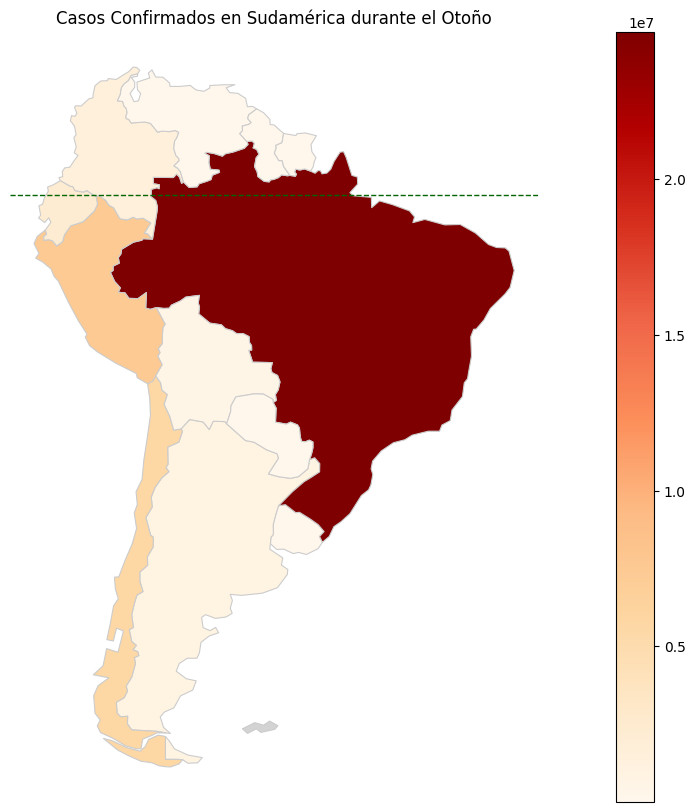

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv('covid_19_clean_complete.csv')

americas_df = df[df['WHO Region'] == 'Americas']

americas_df['Date'] = pd.to_datetime(americas_df['Date'])

americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
americas_df['Deaths'] = americas_df['Deaths'].apply(lambda x: max(x, 0))

start_date = '2020-03-21'
end_date = '2020-06-20'

summer_df = americas_df[(americas_df['Date'] >= start_date) & (americas_df['Date'] <= end_date)]

americas_accumulated = summer_df.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

americas_accumulated['Country/Region'] = americas_accumulated['Country/Region'].replace('US', 'United States of America')

print(americas_accumulated)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

america_north = world[world['continent'] == 'North America']  # Filtrar para América del Norte
america_south = world[world['continent'] == 'South America']  # Filtrar para América del Sur
america = gpd.GeoDataFrame(pd.concat([america_north, america_south], ignore_index=True))

#america_north = world[world['continent'] == 'North America']  # Filtrar para América del Norte
#america_south = world[world['continent'] == 'South America']  # Filtrar para América del Sur
america = america_south


merged_data = america.merge(americas_accumulated, left_on='name', right_on='Country/Region', how='left')

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Casos Confirmados en Sudamérica durante el Otoño')

merged_data.plot(column='Confirmed', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': 'lightgrey'})

ax.set_aspect('equal')

ax.axhline(0, color='darkgreen', linestyle='--', linewidth=1)

ax.axis('off')

plt.show()


<ipython-input-4-9bbc94a8abb0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Date'] = pd.to_datetime(americas_df['Date'])
<ipython-input-4-9bbc94a8abb0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
<ipython-input-4-9bbc94a8abb0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

                      Country/Region  Confirmed   Deaths
0                Antigua and Barbuda       1966      215
1                          Argentina     913238    30346
2                            Bahamas       6661      796
3                           Barbados       6899      479
4                             Belize       1386      148
5                            Bolivia     478597    17144
6                             Brazil   24732681  1378079
7                             Canada    5316756   375369
8                              Chile    5744697    70268
9                           Colombia    1516612    51929
10                        Costa Rica      77719      628
11                              Cuba     127526     4949
12                          Dominica       1393        0
13                Dominican Republic     924320    30121
14                           Ecuador    2262194   165060
15                       El Salvador     114851     2300
16                           Gr

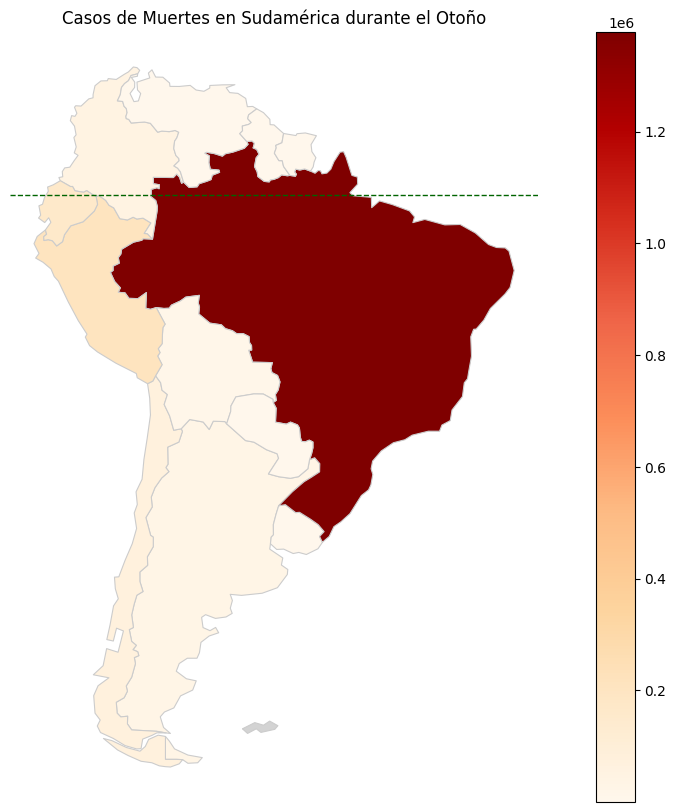

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv('covid_19_clean_complete.csv')

americas_df = df[df['WHO Region'] == 'Americas']

americas_df['Date'] = pd.to_datetime(americas_df['Date'])

americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
americas_df['Deaths'] = americas_df['Deaths'].apply(lambda x: max(x, 0))

start_date = '2020-03-21'
end_date = '2020-06-20'

summer_df = americas_df[(americas_df['Date'] >= start_date) & (americas_df['Date'] <= end_date)]

americas_accumulated = summer_df.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

print(americas_accumulated)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

america_north = world[world['continent'] == 'North America']  # Filtrar para América del Norte
america_south = world[world['continent'] == 'South America']  # Filtrar para América del Sur
america = america_south

merged_data = america.merge(americas_accumulated, left_on='name', right_on='Country/Region', how='left')

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Casos de Muertes en Sudamérica durante el Otoño')

merged_data.plot(column='Deaths', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': 'lightgrey'})

ax.set_aspect('equal')

ax.axhline(0, color='darkgreen', linestyle='--', linewidth=1)

ax.axis('off')

plt.show()


<ipython-input-5-4f6c82cd3851>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Date'] = pd.to_datetime(americas_df['Date'])
<ipython-input-5-4f6c82cd3851>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
<ipython-input-5-4f6c82cd3851>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

                      Country/Region  Confirmed   Deaths
0                Antigua and Barbuda       1953       90
1                          Argentina    2468949    47902
2                            Bahamas       3377      330
3                           Barbados       2985      210
4                             Belize        926       60
5                            Bolivia    1224575    43642
6                             Brazil   48515316  1965285
7                             Canada    3230543   261688
8                              Chile    8800633   189742
9                           Colombia    3747845   129079
10                        Costa Rica     172372      784
11                              Cuba      71411     2584
12                          Dominica        540        0
13                Dominican Republic    1155401    24412
14                           Ecuador    1862749   143295
15                       El Salvador     241571     6465
16                           Gr

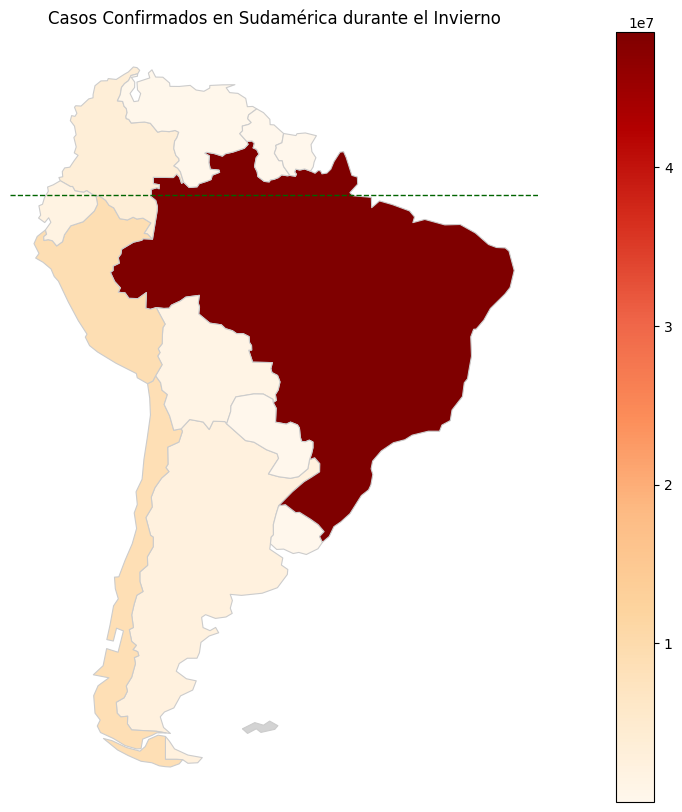

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv('covid_19_clean_complete.csv')

americas_df = df[df['WHO Region'] == 'Americas']

americas_df['Date'] = pd.to_datetime(americas_df['Date'])

americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
americas_df['Deaths'] = americas_df['Deaths'].apply(lambda x: max(x, 0))

start_date = '2020-06-21'
end_date = '2020-07-20'

summer_df = americas_df[(americas_df['Date'] >= start_date) & (americas_df['Date'] <= end_date)]

americas_accumulated = summer_df.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

americas_accumulated['Country/Region'] = americas_accumulated['Country/Region'].replace('US', 'United States of America')

print(americas_accumulated)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

america_north = world[world['continent'] == 'North America']  # Filtrar para América del Norte
america_south = world[world['continent'] == 'South America']  # Filtrar para América del Sur
america = gpd.GeoDataFrame(pd.concat([america_north, america_south], ignore_index=True))

#america_north = world[world['continent'] == 'North America']  # Filtrar para América del Norte
#america_south = world[world['continent'] == 'South America']  # Filtrar para América del Sur
america = america_south


merged_data = america.merge(americas_accumulated, left_on='name', right_on='Country/Region', how='left')

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Casos Confirmados en Sudamérica durante el Invierno')

merged_data.plot(column='Confirmed', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': 'lightgrey'})

ax.set_aspect('equal')

ax.axhline(0, color='darkgreen', linestyle='--', linewidth=1)

ax.axis('off')

plt.show()


<ipython-input-6-077d887e2c66>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Date'] = pd.to_datetime(americas_df['Date'])
<ipython-input-6-077d887e2c66>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
<ipython-input-6-077d887e2c66>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

                      Country/Region  Confirmed   Deaths
0                Antigua and Barbuda       1953       90
1                          Argentina    2468949    47902
2                            Bahamas       3377      330
3                           Barbados       2985      210
4                             Belize        926       60
5                            Bolivia    1224575    43642
6                             Brazil   48515316  1965285
7                             Canada    3230543   261688
8                              Chile    8800633   189742
9                           Colombia    3747845   129079
10                        Costa Rica     172372      784
11                              Cuba      71411     2584
12                          Dominica        540        0
13                Dominican Republic    1155401    24412
14                           Ecuador    1862749   143295
15                       El Salvador     241571     6465
16                           Gr

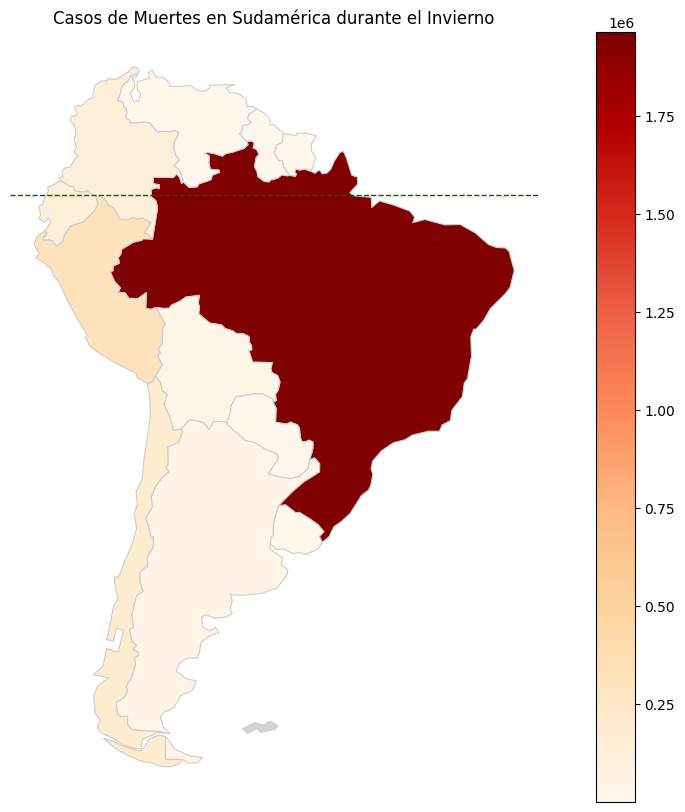

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv('covid_19_clean_complete.csv')

americas_df = df[df['WHO Region'] == 'Americas']

americas_df['Date'] = pd.to_datetime(americas_df['Date'])

americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
americas_df['Deaths'] = americas_df['Deaths'].apply(lambda x: max(x, 0))

start_date = '2020-06-21'
end_date = '2020-07-20'

summer_df = americas_df[(americas_df['Date'] >= start_date) & (americas_df['Date'] <= end_date)]

americas_accumulated = summer_df.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

print(americas_accumulated)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

america_north = world[world['continent'] == 'North America']  # Filtrar para América del Norte
america_south = world[world['continent'] == 'South America']  # Filtrar para América del Sur
america = america_south

merged_data = america.merge(americas_accumulated, left_on='name', right_on='Country/Region', how='left')

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Casos de Muertes en Sudamérica durante el Invierno')

merged_data.plot(column='Deaths', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': 'lightgrey'})

ax.set_aspect('equal')

ax.axhline(0, color='darkgreen', linestyle='--', linewidth=1)

ax.axis('off')

plt.show()
